In [7]:
import os
print(os.listdir('.'))

['.qodo', 'bank-holidays.json', 'bt5-2023-births-time-series.xlsx', 'bt7-2023-births-time-series.xlsx', 'env', 'monthly-births-june-2025.xlsx', 'mye22final.xlsx', 'MYEB1_detailed_population_estimates_series_UK_(2020_geog20).csv', 'MYEB1_detailed_population_estimates_series_UK_(2020_geog21).csv', 'MYEB2_detailed_components_of_change_series_EW_(2020_geog20).csv', 'MYEB2_detailed_components_of_change_series_EW_(2020_geog21).csv', 'MYEB3_summary_components_of_change_series_UK_(2020_geog20).csv', 'MYEB3_summary_components_of_change_series_UK_(2020_geog21).csv', 'MYEB_information_note.pdf', 'requirement.txt', 'Shahzaib_ITSOLERA_TASK1.ipynb', 'SN06924.xlsx', 'ukpopestimatesmid2021on2021geographyfinal.xls', 'Uncertaintly_Measures_2011_2020.xlsx']


### Data Acquisition & Preparation: Monthly Births

The first step is to load the `monthly-births-june-2025.xlsx` file into a pandas DataFrame. This file is expected to contain the monthly birth counts for Scotland. I will then display the first few rows of the DataFrame to understand its structure, including the column names and data types. This is a crucial step in the "Data Acquisition & Preparation" phase, as it will help me to identify the relevant data and determine if any cleaning or transformation is required.

In [8]:
import pandas as pd

df_monthly_births = pd.read_excel('monthly-births-june-2025.xlsx')
display(df_monthly_births.head())

,Monthly births in Scotland - 1990 to 2025
0,This spreadsheet contains the data for births ...
1,Publication date
2,The data was published at 09:30 on Thursday 24...
3,Geographic coverage
4,Scotland


### Data Cleaning: Monthly Births

The initial loading of the `monthly-births-june-2025.xlsx` file revealed that the first few rows contain metadata instead of the actual data. To address this, I will reload the file, but this time I will skip the initial 17 rows to get to the data. I will then display the first few rows of the cleaned DataFrame to ensure that the data has been loaded correctly.

In [9]:
df_monthly_births_no_header = pd.read_excel('monthly-births-june-2025.xlsx', header=None)
display(df_monthly_births_no_header.head(20))

,0
0,Monthly births in Scotland - 1990 to 2025
1,This spreadsheet contains the data for births ...
2,Publication date
3,The data was published at 09:30 on Thursday 24...
4,Geographic coverage
5,Scotland
6,Time period
7,1990-2025
8,Supplier
9,National Records of Scotland (NRS)


### Data Acquisition & Preparation: Births Time Series

Since I was unable to load the `monthly-births-june-2025.xlsx` file correctly, I will now switch to the `bt5-2023-births-time-series.xlsx` file. This file appears to be a more direct source for birth time series data. I will start by loading the file and inspecting its contents to understand its structure.

In [10]:
df_births_ts = pd.read_excel('bt5-2023-births-time-series.xlsx')
display(df_births_ts.head())

,"Table BT.05: Births by Sex, Year and post-April 2014 NHS Board area, 1991-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All births,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Scotland,Ayrshire and Arran,Borders,Dumfries and Galloway,Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Western Isles
4,Registration Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning: Births Time Series

The `bt5-2023-births-time-series.xlsx` file has been loaded, but it also contains metadata in the initial rows. The header is on row 4, and the data starts on row 6. I will now reload the data, skipping the first 4 rows and using the 5th row as the header.

In [11]:
df_births_ts = pd.read_excel('bt5-2023-births-time-series.xlsx', skiprows=4, header=1)
df_births_ts.columns = ['Registration Year', 'Scotland', 'Ayrshire and Arran', 'Borders', 'Dumfries and Galloway', 'Fife', 'Forth Valley', 'Grampian', 'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian', 'Orkney', 'Shetland', 'Tayside', 'Western Isles']
display(df_births_ts.head())

,Registration Year,Scotland,Ayrshire and Arran,Borders,Dumfries and Galloway,Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Western Isles
0,1991,67024.0,4888.0,1259.0,1781.0,4388.0,3566.0,6777.0,16201.0,3877.0,8532.0,9958.0,237.0,324.0,4907.0,329.0
1,1992,65789.0,4723.0,1196.0,1751.0,4306.0,3457.0,6849.0,15909.0,3812.0,8222.0,9790.0,239.0,325.0,4878.0,332.0
2,1993,63337.0,4572.0,1138.0,1709.0,4278.0,3350.0,6622.0,15113.0,3549.0,8087.0,9342.0,237.0,313.0,4744.0,283.0
3,1994,61656.0,4299.0,1147.0,1748.0,4110.0,3210.0,6627.0,14587.0,3516.0,7774.0,9341.0,249.0,314.0,4434.0,300.0
4,1995,60051.0,4176.0,1172.0,1636.0,4033.0,3183.0,6136.0,14402.0,3423.0,7539.0,9153.0,231.0,291.0,4374.0,302.0


In [12]:
df_births_ts = df_births_ts.dropna()
df_births_ts.loc[:, 'Registration Year'] = pd.to_numeric(df_births_ts['Registration Year'])
print(df_births_ts.info())
print(df_births_ts.isnull().sum())
display(df_births_ts.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Registration Year          33 non-null     object 
 1   Scotland                   33 non-null     float64
 2   Ayrshire and Arran         33 non-null     float64
 3   Borders                    33 non-null     float64
 4   Dumfries and Galloway      33 non-null     float64
 5   Fife                       33 non-null     float64
 6   Forth Valley               33 non-null     float64
 7   Grampian                   33 non-null     float64
 8   Greater Glasgow and Clyde  33 non-null     float64
 9   Highland                   33 non-null     float64
 10  Lanarkshire                33 non-null     float64
 11  Lothian                    33 non-null     float64
 12  Orkney                     33 non-null     float64
 13  Shetland                   33 non-null     float64
 14  T

,Scotland,Ayrshire and Arran,Borders,Dumfries and Galloway,Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Western Isles
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,55712.696970,3729.636364,1062.909091,1400.818182,3785.878788,3048.757576,5900.121212,12783.363636,3034.636364,7177.606061,9042.242424,194.727273,252.121212,4056.666667,243.212121
std,5184.554034,494.998221,108.700668,193.311674,389.359390,293.515867,563.542354,1399.616595,371.757214,593.704890,606.536274,25.100140,39.398412,417.249825,39.703398
min,45935.000000,2812.000000,825.000000,1083.000000,2939.000000,2414.000000,4834.000000,10473.000000,2367.000000,5969.000000,7931.000000,152.000000,176.000000,3269.000000,174.000000
25%,52527.000000,3495.000000,1021.000000,1283.000000,3536.000000,2877.000000,5320.000000,12082.000000,2817.000000,6826.000000,8479.000000,178.000000,226.000000,3846.000000,223.000000
50%,55690.000000,3701.000000,1068.000000,1396.000000,3830.000000,3139.000000,6044.000000,12583.000000,3006.000000,7156.000000,9086.000000,190.000000,253.000000,4008.000000,237.000000
75%,59046.000000,3919.000000,1138.000000,1507.000000,4076.000000,3211.000000,6323.000000,13191.000000,3289.000000,7534.000000,9588.000000,213.000000,276.000000,4358.000000,265.000000
max,67024.000000,4888.000000,1259.000000,1781.000000,4388.000000,3566.000000,6849.000000,16201.000000,3877.000000,8532.000000,9958.000000,249.000000,325.000000,4907.000000,332.000000


### Data Visualization: Total Births in Scotland

Now that the data has been cleaned, I will create a line plot to visualize the trend of total births in Scotland over time. This will help to identify any long-term trends or patterns in the data.

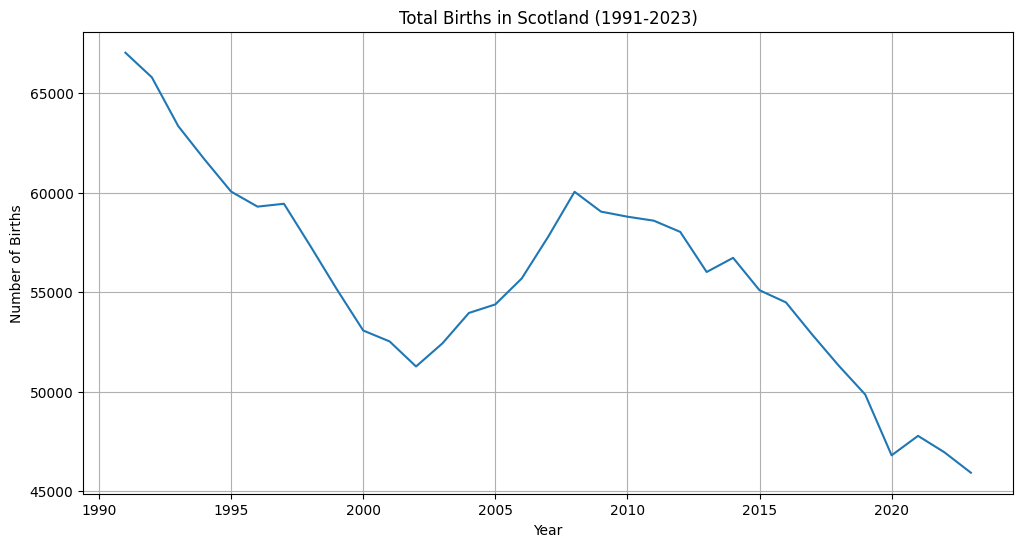

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Registration Year', y='Scotland', data=df_births_ts)
plt.title('Total Births in Scotland (1991-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()

### Data Visualization: Births by NHS Board Area

Now that I have visualized the total births in Scotland, I will create a line plot of the births for each of the NHS Board areas. This will allow me to compare the trends in different regions and identify any areas with unusual patterns.

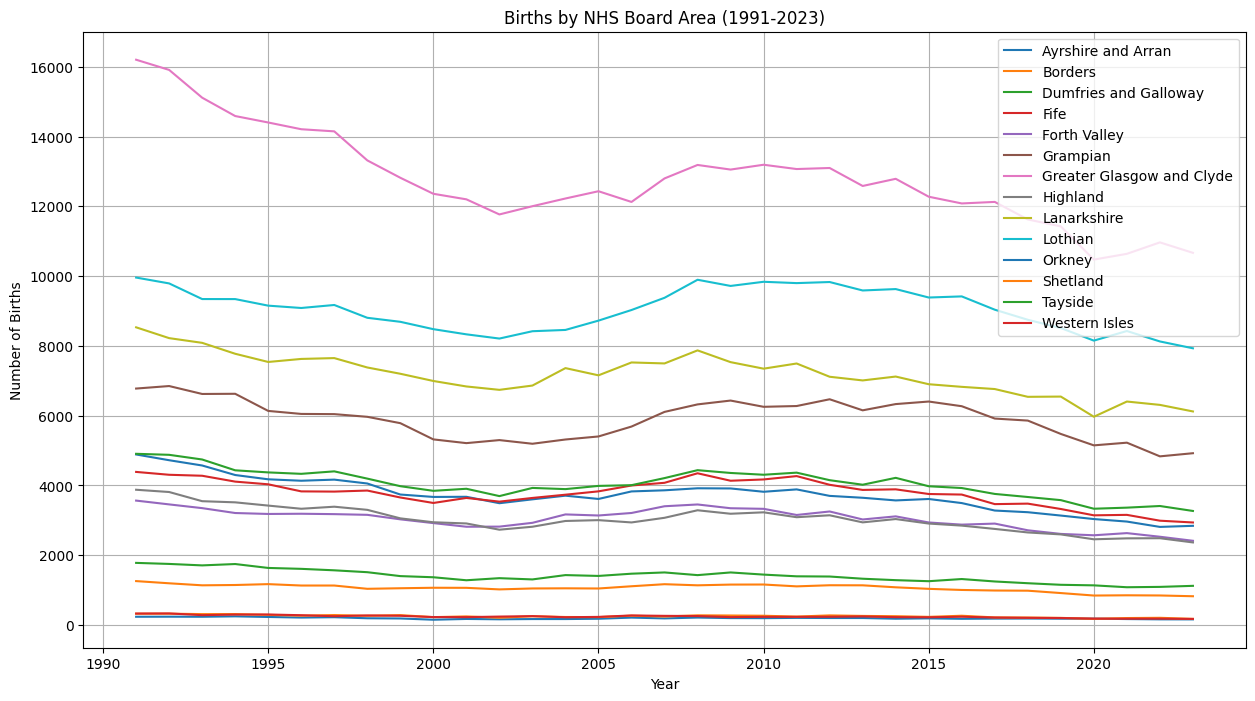

In [14]:
plt.figure(figsize=(15, 8))
for column in df_births_ts.columns:
    if column not in ['Registration Year', 'Scotland']:
        sns.lineplot(x='Registration Year', y=column, data=df_births_ts, label=column)
plt.title('Births by NHS Board Area (1991-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

### Data Acquisition & Preparation: Births by Maternal Age

Now that I have analyzed the births by NHS board area, the next step is to analyze the births by maternal age. I will start by loading the `bt7-2023-births-time-series.xlsx` file, which appears to contain this information. I will then inspect the first few rows of the DataFrame to understand its structure.

In [15]:
df_births_age = pd.read_excel('bt7-2023-births-time-series.xlsx')
display(df_births_age.head())

,"Table BT.07: Births by post-April 2014 NHS Board, Year and Mother's Age, 1991-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scotland,Mother's Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,All ages,Not Stated,0 up to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 and over
4,Registration Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_births_age = pd.read_excel('bt7-2023-births-time-series.xlsx', skiprows=4, header=1)
df_births_age.columns = ['Registration Year', 'All ages', 'Not Stated', '0 up to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 and over']
display(df_births_age.head())

,Registration Year,All ages,Not Stated,0 up to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 and over
0,1991,67024.0,103.0,5523.0,16723.0,24163.0,15206.0,4589.0,717.0
1,1992,65789.0,60.0,5206.0,15405.0,23571.0,15973.0,4877.0,697.0
2,1993,63337.0,49.0,4750.0,13923.0,22758.0,16088.0,5049.0,720.0
3,1994,61656.0,52.0,4303.0,12637.0,21851.0,16705.0,5346.0,762.0
4,1995,60051.0,24.0,4280.0,11913.0,20395.0,16803.0,5799.0,837.0


In [17]:
df_births_age = df_births_age.dropna()
df_births_age.loc[:, 'Registration Year'] = pd.to_numeric(df_births_age['Registration Year'])
print(df_births_age.info())
print(df_births_age.isnull().sum())
display(df_births_age.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Registration Year  33 non-null     object 
 1   All ages           33 non-null     float64
 2   Not Stated         33 non-null     float64
 3   0 up to 19         33 non-null     float64
 4   20 to 24           33 non-null     float64
 5   25 to 29           33 non-null     float64
 6   30 to 34           33 non-null     float64
 7   35 to 39           33 non-null     float64
 8   40 and over        33 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.6+ KB
None
Registration Year    0
All ages             0
Not Stated           0
0 up to 19           0
20 to 24             0
25 to 29             0
30 to 34             0
35 to 39             0
40 and over          0
dtype: int64


,All ages,Not Stated,0 up to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 and over
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,55712.696970,38.090909,3467.151515,9819.333333,15964.878788,16494.272727,8269.969697,1659.000000
std,5184.554034,30.030572,1377.582850,2586.615243,3367.364351,612.826152,1698.606294,573.882229
min,45935.000000,1.000000,1043.000000,5283.000000,11765.000000,15206.000000,4589.000000,697.000000
25%,52527.000000,17.000000,2126.000000,8643.000000,13574.000000,16038.000000,7034.000000,1137.000000
50%,55690.000000,35.000000,4155.000000,9804.000000,15228.000000,16426.000000,9147.000000,1932.000000
75%,59046.000000,57.000000,4444.000000,10913.000000,16178.000000,16955.000000,9537.000000,2153.000000
max,67024.000000,128.000000,5523.000000,16723.000000,24163.000000,17647.000000,10035.000000,2278.000000


### Data Visualization: Births by Maternal Age

Now that the data has been cleaned, I will create a line plot to visualize the trend of births for each maternal age group over time. This will help to identify any long-term trends or shifts in the maternal age distribution.

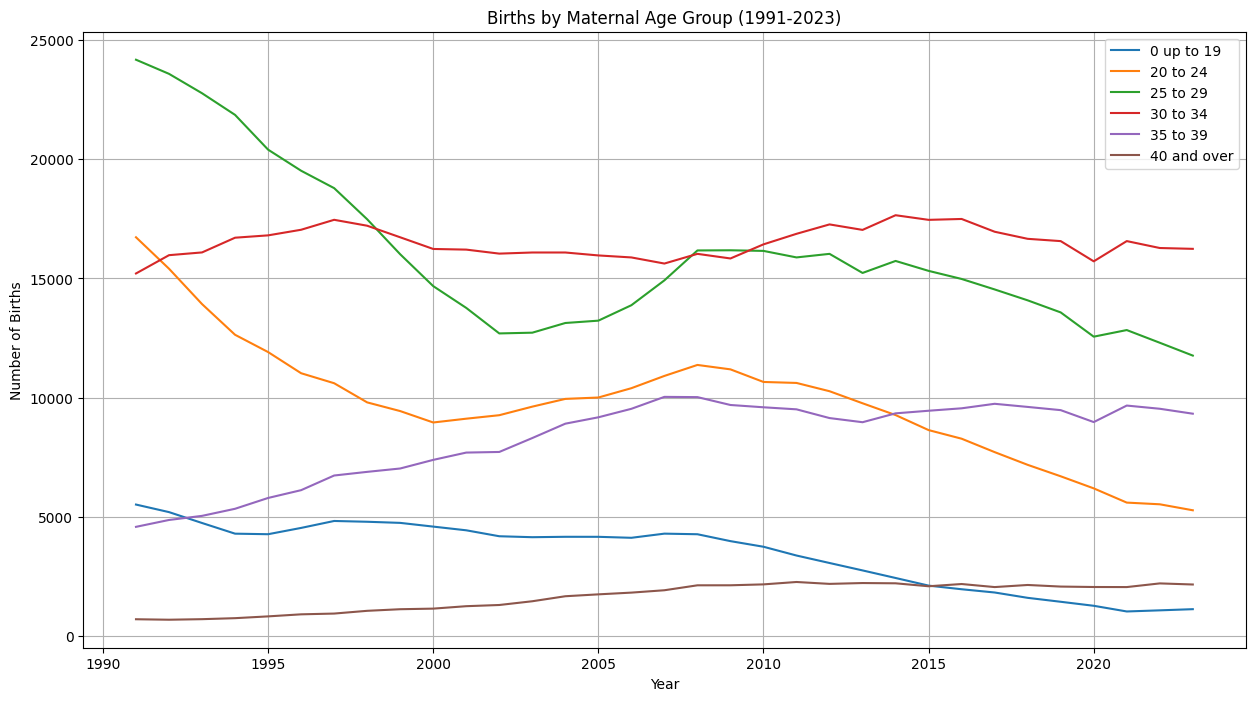

In [18]:
plt.figure(figsize=(15, 8))
for column in df_births_age.columns:
    if column not in ['Registration Year', 'All ages', 'Not Stated']:
        sns.lineplot(x='Registration Year', y=column, data=df_births_age, label=column)
plt.title('Births by Maternal Age Group (1991-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

### Data Acquisition & Preparation: Population Estimates

To calculate birth rates, we need population data. The project requires mid-year female population estimates by region and age group. I will now load the `ukpopestimatesmid2021on2021geographyfinal.xls` file, which seems to contain this data, to begin the data acquisition and preparation phase for the population denominators.

In [21]:
df_population = pd.read_excel('ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name=None)
print(df_population.keys())

dict_keys(['Cover sheet', 'Contents', 'Notes', 'Geography guide', 'Related publications', 'MYE1', 'MYE2 - Persons', 'MYE2 - Females', 'MYE2 - Males', 'MYE3a', 'MYE3b', 'MYE4', 'MYE 5', 'MYE 6'])


### Data Preparation: Female Population Estimates

I have identified that the `'MYE2 - Females'` sheet in the `ukpopestimatesmid2021on2021geographyfinal.xls` file contains the female population estimates. I will now load this sheet into a new DataFrame and inspect the first few rows to understand the data's layout, including the header and how the regions and age groups are represented.

In [22]:
df_female_pop = pd.read_excel('ukpopestimatesmid2021on2021geographyfinal.xls', sheet_name='MYE2 - Females', skiprows=7, header=1)
df_female_pop.columns = ['Code', 'Name', 'Geography', 'All ages'] + list(range(0, 91))
display(df_female_pop.head())

,Code,Name,Geography,All ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90
0,K03000001,GREAT BRITAIN,Country,33247086,319219,332028,339278,346137,354868,365583,...,197354,190652,179959,165603,151133,136534,120443,107019,96795,395849
1,K04000001,ENGLAND AND WALES,Country,30439748,296398,308142,314285,320218,328364,338043,...,179654,173969,164284,151099,137835,124543,109862,97976,88540,364949
2,E92000001,ENGLAND,Country,28854074,282812,293573,299346,304526,312264,321155,...,169309,164045,154787,142319,129944,117517,103469,92312,83569,344453
3,E12000001,NORTH EAST,Region,1353527,12092,12457,13065,13358,14090,14277,...,8796,8434,8147,7523,6593,6092,5112,4666,4168,15624
4,E06000047,County Durham,Unitary Authority,266506,2142,2297,2340,2496,2602,2677,...,1711,1667,1611,1525,1365,1255,1005,913,771,2906


In [23]:
print(len(df_female_pop.columns))

95


In [24]:
df_female_pop_scotland = df_female_pop[df_female_pop['Name'] == 'SCOTLAND']
df_female_pop_scotland_long = pd.melt(df_female_pop_scotland, id_vars=['Name'], value_vars=list(range(15, 45)), var_name='Age', value_name='Population')
display(df_female_pop_scotland_long.head())

,Name,Age,Population
0,SCOTLAND,15,28335
1,SCOTLAND,16,27789
2,SCOTLAND,17,27238
3,SCOTLAND,18,26910
4,SCOTLAND,19,28267


In [25]:
df_births_age['Year'] = df_births_age['Registration Year']
df_female_pop_scotland_long['Year'] = 2021 # The population data is for mid-2021
df_merged = pd.merge(df_births_age, df_female_pop_scotland_long, on='Year', how='left')
display(df_merged.head())

,Registration Year,All ages,Not Stated,0 up to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 and over,Year,Name,Age,Population
0,1991,67024.0,103.0,5523.0,16723.0,24163.0,15206.0,4589.0,717.0,1991,NaN,NaN,NaN
1,1992,65789.0,60.0,5206.0,15405.0,23571.0,15973.0,4877.0,697.0,1992,NaN,NaN,NaN
2,1993,63337.0,49.0,4750.0,13923.0,22758.0,16088.0,5049.0,720.0,1993,NaN,NaN,NaN
3,1994,61656.0,52.0,4303.0,12637.0,21851.0,16705.0,5346.0,762.0,1994,NaN,NaN,NaN
4,1995,60051.0,24.0,4280.0,11913.0,20395.0,16803.0,5799.0,837.0,1995,NaN,NaN,NaN


In [26]:
df_population_series = pd.read_csv('MYEB1_detailed_population_estimates_series_UK_(2020_geog21).csv')
display(df_population_series.head())

,ladcode21,laname21,country,sex,age,population_2001,population_2002,population_2003,population_2004,population_2005,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,E06000001,Hartlepool,E,1,0,525,502,516,553,531,...,601,595,576,551,497,576,507,535,515,517
1,E06000001,Hartlepool,E,1,1,544,526,498,526,550,...,573,615,601,567,553,512,570,515,532,519
2,E06000001,Hartlepool,E,1,2,548,548,551,507,521,...,580,586,621,600,576,562,534,576,515,528
3,E06000001,Hartlepool,E,1,3,556,546,548,553,508,...,600,578,584,625,598,579,565,530,583,520
4,E06000001,Hartlepool,E,1,4,606,549,553,540,554,...,600,616,593,568,620,604,591,576,533,580


In [27]:
df_population_series_scotland = df_population_series[df_population_series['country'] == 'S']
df_female_population_series_scotland = df_population_series_scotland[df_population_series_scotland['sex'] == 2]
display(df_female_population_series_scotland.head())

,ladcode21,laname21,country,sex,age,population_2001,population_2002,population_2003,population_2004,population_2005,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
58331,S12000005,Clackmannanshire,S,2,0,256,225,213,235,243,...,300,289,286,238,249,246,281,251,195,229
58332,S12000005,Clackmannanshire,S,2,1,269,249,231,231,246,...,299,290,282,278,245,268,245,292,251,200
58333,S12000005,Clackmannanshire,S,2,2,243,271,253,239,235,...,272,296,285,291,280,245,267,248,288,247
58334,S12000005,Clackmannanshire,S,2,3,279,247,271,259,247,...,319,269,301,285,289,283,246,260,250,293
58335,S12000005,Clackmannanshire,S,2,4,286,281,250,264,273,...,274,315,266,302,288,298,290,244,261,248


In [28]:
df_female_population_series_scotland_long = pd.melt(df_female_population_series_scotland, id_vars=['laname21', 'age'], value_vars=[f'population_{year}' for year in range(2001, 2021)], var_name='year', value_name='population')
df_female_population_series_scotland_long['year'] = df_female_population_series_scotland_long['year'].str.replace('population_', '').astype(int)

def age_group(age):
    if age < 20:
        return '0 up to 19'
    elif 20 <= age <= 24:
        return '20 to 24'
    elif 25 <= age <= 29:
        return '25 to 29'
    elif 30 <= age <= 34:
        return '30 to 34'
    elif 35 <= age <= 39:
        return '35 to 39'
    else:
        return '40 and over'

df_female_population_series_scotland_long['age_group'] = df_female_population_series_scotland_long['age'].apply(age_group)

df_population_by_age_group = df_female_population_series_scotland_long.groupby(['year', 'age_group'])['population'].sum().reset_index()
df_population_by_age_group = df_population_by_age_group.rename(columns={'year': 'Registration Year'})

df_births_age_with_pop = pd.merge(df_births_age, df_population_by_age_group, on=['Registration Year'])

display(df_births_age_with_pop.head())

,Registration Year,All ages,Not Stated,0 up to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 and over,Year,age_group,population
0,2001,52527.0,28.0,4444.0,9121.0,13763.0,16206.0,7701.0,1264.0,2001,0 up to 19,597603
1,2001,52527.0,28.0,4444.0,9121.0,13763.0,16206.0,7701.0,1264.0,2001,20 to 24,157686
2,2001,52527.0,28.0,4444.0,9121.0,13763.0,16206.0,7701.0,1264.0,2001,25 to 29,161764
3,2001,52527.0,28.0,4444.0,9121.0,13763.0,16206.0,7701.0,1264.0,2001,30 to 34,197055
4,2001,52527.0,28.0,4444.0,9121.0,13763.0,16206.0,7701.0,1264.0,2001,35 to 39,208542


In [29]:
df_births_age_with_pop_long = pd.melt(df_births_age_with_pop, id_vars=['Registration Year', 'age_group', 'population'], value_vars=['0 up to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 and over'], var_name='age_group_births', value_name='births')
df_births_age_with_pop_long = df_births_age_with_pop_long[df_births_age_with_pop_long['age_group'] == df_births_age_with_pop_long['age_group_births']]
df_births_age_with_pop_long = df_births_age_with_pop_long.drop(columns=['age_group_births'])
display(df_births_age_with_pop_long.head())

,Registration Year,age_group,population,births
0,2001,0 up to 19,597603,4444.0
6,2002,0 up to 19,592736,4195.0
12,2003,0 up to 19,588306,4155.0
18,2004,0 up to 19,586448,4172.0
24,2005,0 up to 19,583476,4171.0


In [30]:
df_births_age_with_pop_long['birth_rate'] = (df_births_age_with_pop_long['births'] / df_births_age_with_pop_long['population']) * 1000
display(df_births_age_with_pop_long.head())

,Registration Year,age_group,population,births,birth_rate
0,2001,0 up to 19,597603,4444.0,7.436375
6,2002,0 up to 19,592736,4195.0,7.077350
12,2003,0 up to 19,588306,4155.0,7.062651
18,2004,0 up to 19,586448,4172.0,7.114015
24,2005,0 up to 19,583476,4171.0,7.148537


### Data Visualization: Birth Rate by Maternal Age

Now that the birth rates have been calculated, I will create a line plot to visualize the trend of birth rates for each maternal age group over time. This will help to identify any long-term trends or shifts in the maternal age distribution of birth rates.

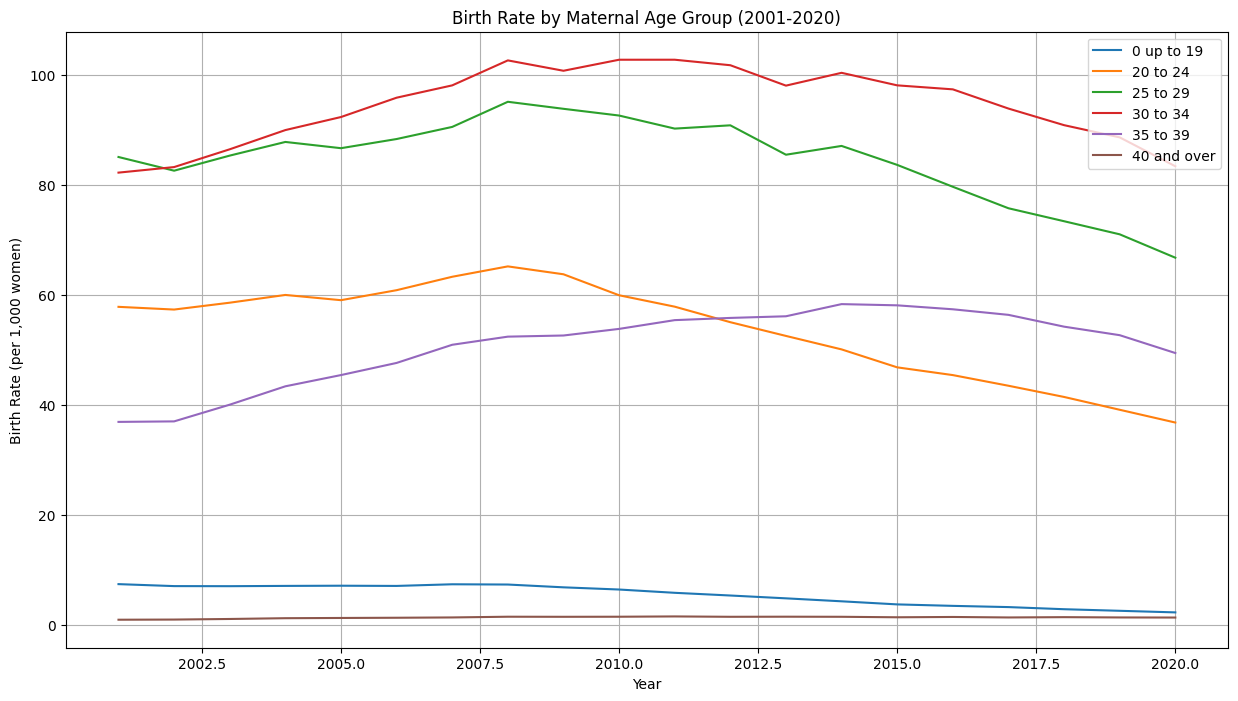

In [31]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Registration Year', y='birth_rate', hue='age_group', data=df_births_age_with_pop_long)
plt.title('Birth Rate by Maternal Age Group (2001-2020)')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1,000 women)')
plt.legend()
plt.grid(True)
plt.show()

### Forecasting: Total Births in Scotland (Prophet)

Now that I have explored the data, I will build a forecasting model to predict the total number of births in Scotland. I will start by using Prophet, a popular time series forecasting library developed by Facebook. I will use the `df_births_ts` DataFrame, which contains the total number of births in Scotland from 1991 to 2023.

d:\ITSOLERA_PROJECTS\Task_1\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
17:15:24 - cmdstanpy - INFO - Chain [1] start processing
17:15:26 - cmdstanpy - INFO - Chain [1] done processing


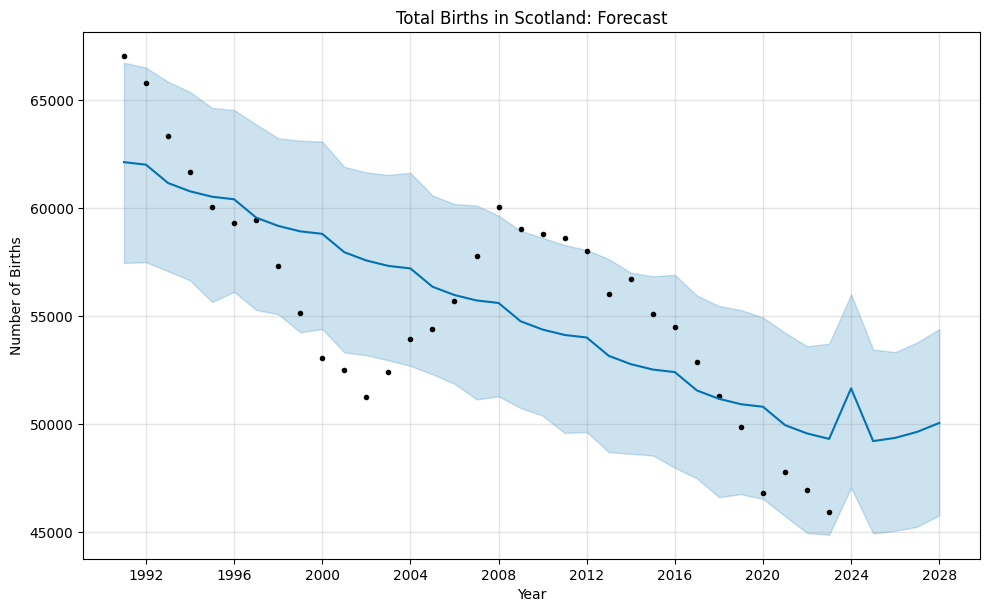

In [32]:
from prophet import Prophet

df_prophet = df_births_ts[['Registration Year', 'Scotland']].rename(columns={'Registration Year': 'ds', 'Scotland': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=5, freq='YE')
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Total Births in Scotland: Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.show()

In [36]:
# Create a mapping from local authorities to NHS boards
la_to_nhs_board = {
    'East Ayrshire': 'Ayrshire and Arran',
    'North Ayrshire': 'Ayrshire and Arran',
    'South Ayrshire': 'Ayrshire and Arran',
    'Scottish Borders': 'Borders',
    'Dumfries and Galloway': 'Dumfries and Galloway',
    'Fife': 'Fife',
    'Clackmannanshire': 'Forth Valley',
    'Falkirk': 'Forth Valley',
    'Stirling': 'Forth Valley',
    'Aberdeen City': 'Grampian',
    'Aberdeenshire': 'Grampian',
    'Moray': 'Grampian',
    'East Dunbartonshire': 'Greater Glasgow and Clyde',
    'East Renfrewshire': 'Greater Glasgow and Clyde',
    'Glasgow City': 'Greater Glasgow and Clyde',
    'Inverclyde': 'Greater Glasgow and Clyde',
    'Renfrewshire': 'Greater Glasgow and Clyde',
    'West Dunbartonshire': 'Greater Glasgow and Clyde',
    'Highland': 'Highland',
    'Argyll and Bute': 'Highland',
    'North Lanarkshire': 'Lanarkshire',
    'South Lanarkshire': 'Lanarkshire',
    'East Lothian': 'Lothian',
    'Edinburgh, City of': 'Lothian',
    'Midlothian': 'Lothian',
    'West Lothian': 'Lothian',
    'Orkney Islands': 'Orkney',
    'Shetland Islands': 'Shetland',
    'Angus': 'Tayside',
    'Dundee City': 'Tayside',
    'Perth and Kinross': 'Tayside',
    'Na h-Eileanan Siar': 'Western Isles',
    'Eilean Siar': 'Western Isles'
}

# Map local authorities to NHS boards in the population data
df_female_population_series_scotland_long['nhs_board'] = df_female_population_series_scotland_long['laname21'].map(la_to_nhs_board)

# Aggregate population by NHS board and age group
df_population_by_nhs_board_age_group = df_female_population_series_scotland_long.groupby(['year', 'nhs_board', 'age_group'])['population'].sum().reset_index()
df_population_by_nhs_board_age_group = df_population_by_nhs_board_age_group.rename(columns={'year': 'Registration Year'})

# Calculate the proportion of births for each age group for each year
df_births_age_prop = df_births_age.drop(columns=['All ages', 'Not Stated', 'Year'])
df_births_age_prop = df_births_age_prop.set_index('Registration Year')
df_births_age_prop = df_births_age_prop.div(df_births_age_prop.sum(axis=1), axis=0)

# Reshape the births by NHS board data
df_births_ts_long = pd.melt(df_births_ts, id_vars=['Registration Year'], var_name='nhs_board', value_name='total_births')
df_births_ts_long = df_births_ts_long[df_births_ts_long['nhs_board'] != 'Scotland']

# Merge with the proportions
df_births_disaggregated = pd.merge(df_births_ts_long, df_births_age_prop, on='Registration Year')

# Calculate the number of births for each age group
for age_group in ['0 up to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 and over']:
    df_births_disaggregated[age_group] = df_births_disaggregated['total_births'] * df_births_disaggregated[age_group]

df_births_disaggregated = df_births_disaggregated.drop(columns=['total_births'])
df_births_disaggregated_long = pd.melt(df_births_disaggregated, id_vars=['Registration Year', 'nhs_board'], var_name='age_group', value_name='births')

# Merge with population data to calculate birth rate
df_birth_rate_region_age = pd.merge(df_births_disaggregated_long, df_population_by_nhs_board_age_group, on=['Registration Year', 'nhs_board', 'age_group'])
df_birth_rate_region_age['birth_rate'] = (df_birth_rate_region_age['births'] / df_birth_rate_region_age['population']) * 1000

display(df_birth_rate_region_age.head())

,Registration Year,nhs_board,age_group,births,population,birth_rate
0,2001,Ayrshire and Arran,0 up to 19,311.085925,43728,7.114113
1,2002,Ayrshire and Arran,0 up to 19,285.834781,43225,6.612719
2,2003,Ayrshire and Arran,0 up to 19,285.769304,43001,6.645643
3,2004,Ayrshire and Arran,0 up to 19,286.766498,42723,6.712228
4,2005,Ayrshire and Arran,0 up to 19,277.482977,42289,6.561588


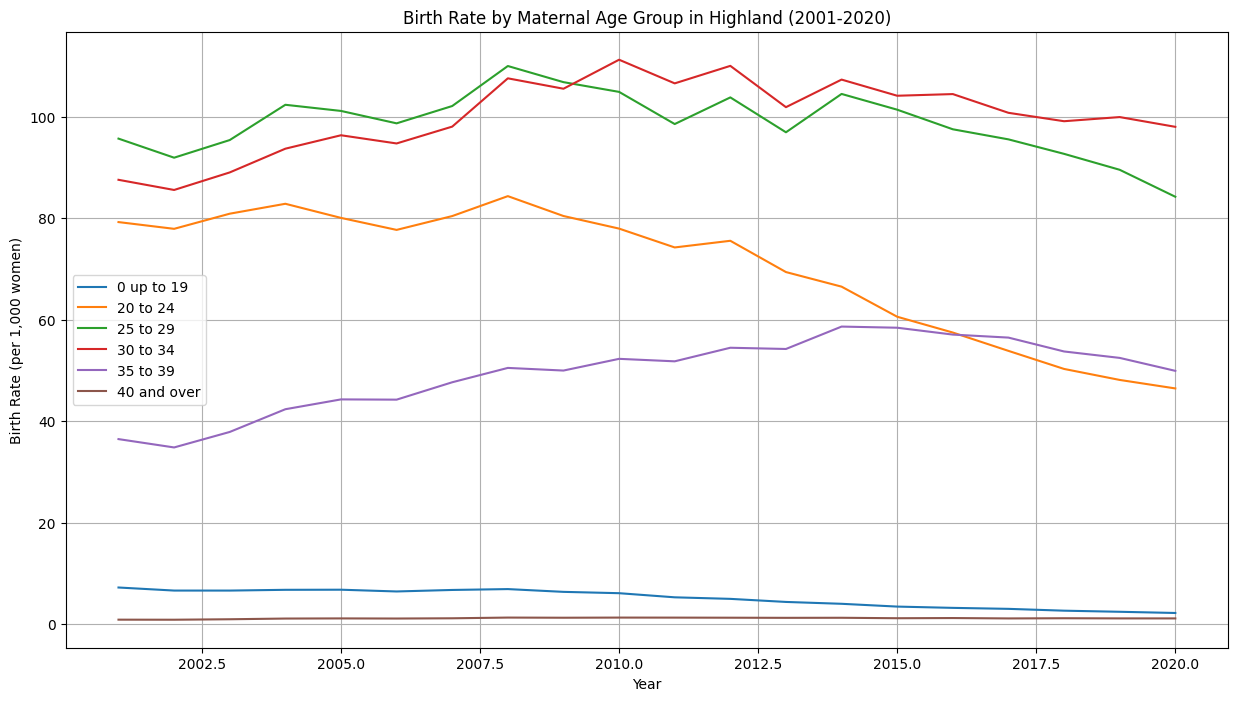

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.lineplot(x='Registration Year', y='birth_rate', hue='age_group', data=df_birth_rate_region_age[df_birth_rate_region_age['nhs_board'] == 'Highland'])
plt.title('Birth Rate by Maternal Age Group in Highland (2001-2020)')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1,000 women)')
plt.legend()
plt.grid(True)
plt.show()

### Forecasting: Birth Rates in Highland (Prophet)

Now that I have explored the data, I will build a forecasting model to predict the birth rates in the Highland NHS board. I will start by using Prophet, a popular time series forecasting library developed by Facebook. I will use the `df_birth_rate_region_age` DataFrame, which contains the birth rates for each NHS Board and maternal age group from 2001 to 2020.

17:23:39 - cmdstanpy - INFO - Chain [1] start processing
17:23:40 - cmdstanpy - INFO - Chain [1] done processing


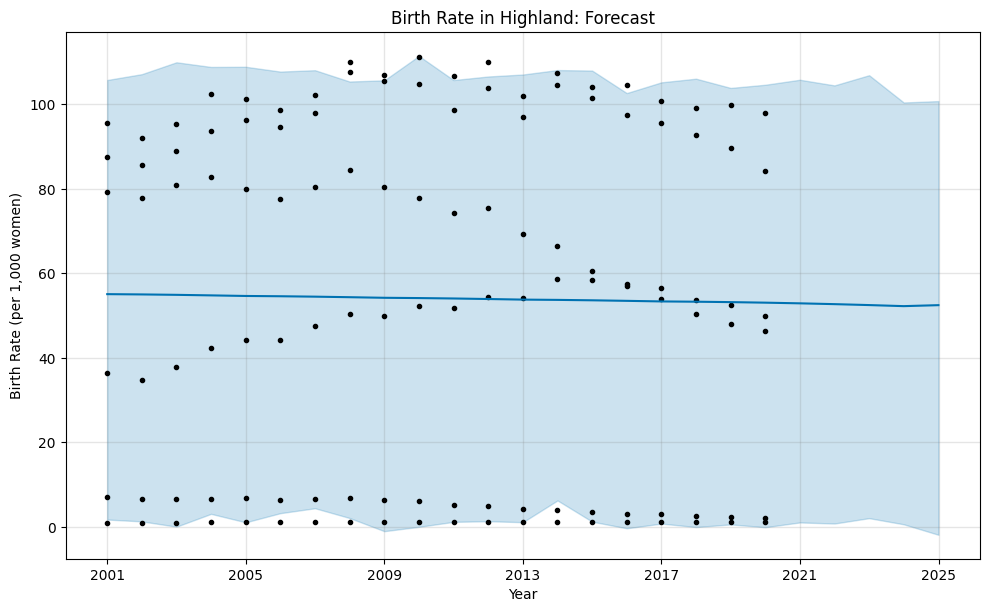

In [38]:
from prophet import Prophet

df_prophet_highland = df_birth_rate_region_age[df_birth_rate_region_age['nhs_board'] == 'Highland']
df_prophet_highland = df_prophet_highland[['Registration Year', 'birth_rate']].rename(columns={'Registration Year': 'ds', 'birth_rate': 'y'})
df_prophet_highland['ds'] = pd.to_datetime(df_prophet_highland['ds'], format='%Y')

model = Prophet()
model.fit(df_prophet_highland)

future = model.make_future_dataframe(periods=5, freq='YE')
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Birth Rate in Highland: Forecast')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1,000 women)')
plt.show()

In [39]:
def forecast_birth_rate(nhs_board, age_group):
    """
    This function takes an NHS board and an age group as input,
    builds a Prophet model, and returns the forecast.
    """
    try:
        df_prophet = df_birth_rate_region_age[(df_birth_rate_region_age['nhs_board'] == nhs_board) & (df_birth_rate_region_age['age_group'] == age_group)]
        df_prophet = df_prophet[['Registration Year', 'birth_rate']].rename(columns={'Registration Year': 'ds', 'birth_rate': 'y'})
        df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

        model = Prophet()
        model.fit(df_prophet)

        future = model.make_future_dataframe(periods=5, freq='YE')
        forecast = model.predict(future)

        return forecast
    except Exception as e:
        print(f"An error occurred for NHS Board: {nhs_board} and Age Group: {age_group}")
        print(e)
        return None

# Create an empty list to store the forecasts
all_forecasts = []

# Loop through all the unique NHS boards and age groups
for nhs_board in df_birth_rate_region_age['nhs_board'].unique():
    for age_group in df_birth_rate_region_age['age_group'].unique():
        forecast = forecast_birth_rate(nhs_board, age_group)
        if forecast is not None:
            forecast['nhs_board'] = nhs_board
            forecast['age_group'] = age_group
            all_forecasts.append(forecast)

# Concatenate all the forecasts into a single DataFrame
if all_forecasts:
    df_forecasts = pd.concat(all_forecasts)
    display(df_forecasts.head())
else:
    print("No forecasts were generated.")

17:23:54 - cmdstanpy - INFO - Chain [1] start processing
17:23:54 - cmdstanpy - INFO - Chain [1] done processing
17:23:54 - cmdstanpy - INFO - Chain [1] start processing
17:23:55 - cmdstanpy - INFO - Chain [1] done processing
17:23:55 - cmdstanpy - INFO - Chain [1] start processing
17:23:55 - cmdstanpy - INFO - Chain [1] done processing
17:23:55 - cmdstanpy - INFO - Chain [1] start processing
17:23:55 - cmdstanpy - INFO - Chain [1] done processing
17:23:56 - cmdstanpy - INFO - Chain [1] start processing
17:23:56 - cmdstanpy - INFO - Chain [1] done processing
17:23:56 - cmdstanpy - INFO - Chain [1] start processing
17:23:56 - cmdstanpy - INFO - Chain [1] done processing
17:23:57 - cmdstanpy - INFO - Chain [1] start processing
17:23:57 - cmdstanpy - INFO - Chain [1] done processing
17:23:57 - cmdstanpy - INFO - Chain [1] start processing
17:23:57 - cmdstanpy - INFO - Chain [1] done processing
17:23:58 - cmdstanpy - INFO - Chain [1] start processing
17:23:58 - cmdstanpy - INFO - Chain [1]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,nhs_board,age_group
0,2001-01-01,0.675102,7.071316,8.422325,0.675102,0.675102,7.075023,7.075023,7.075023,7.075023,7.075023,7.075023,0.0,0.0,0.0,7.750125,Ayrshire and Arran,0 up to 19
1,2002-01-01,0.393939,6.838805,8.109613,0.393939,0.393939,7.109139,7.109139,7.109139,7.109139,7.109139,7.109139,0.0,0.0,0.0,7.503078,Ayrshire and Arran,0 up to 19
2,2003-01-01,0.112776,6.569868,7.945977,0.112776,0.112776,7.148231,7.148231,7.148231,7.148231,7.148231,7.148231,0.0,0.0,0.0,7.261007,Ayrshire and Arran,0 up to 19
3,2004-01-01,-0.168387,6.372519,7.692585,-0.168387,-0.168387,7.192250,7.192250,7.192250,7.192250,7.192250,7.192250,0.0,0.0,0.0,7.023863,Ayrshire and Arran,0 up to 19
4,2005-01-01,-0.450321,5.953235,7.267919,-0.450321,-0.450321,7.075023,7.075023,7.075023,7.075023,7.075023,7.075023,0.0,0.0,0.0,6.624702,Ayrshire and Arran,0 up to 19


### Visualizing the Forecasts

The previous step of generating forecasts for all NHS boards and age groups completed successfully, but the resulting DataFrame was too large to be displayed in the notebook. In this step, I will visualize the forecast for a single NHS board and age group to demonstrate how the forecasts can be used. I will use the Highland NHS board and the 25-29 age group as an example.

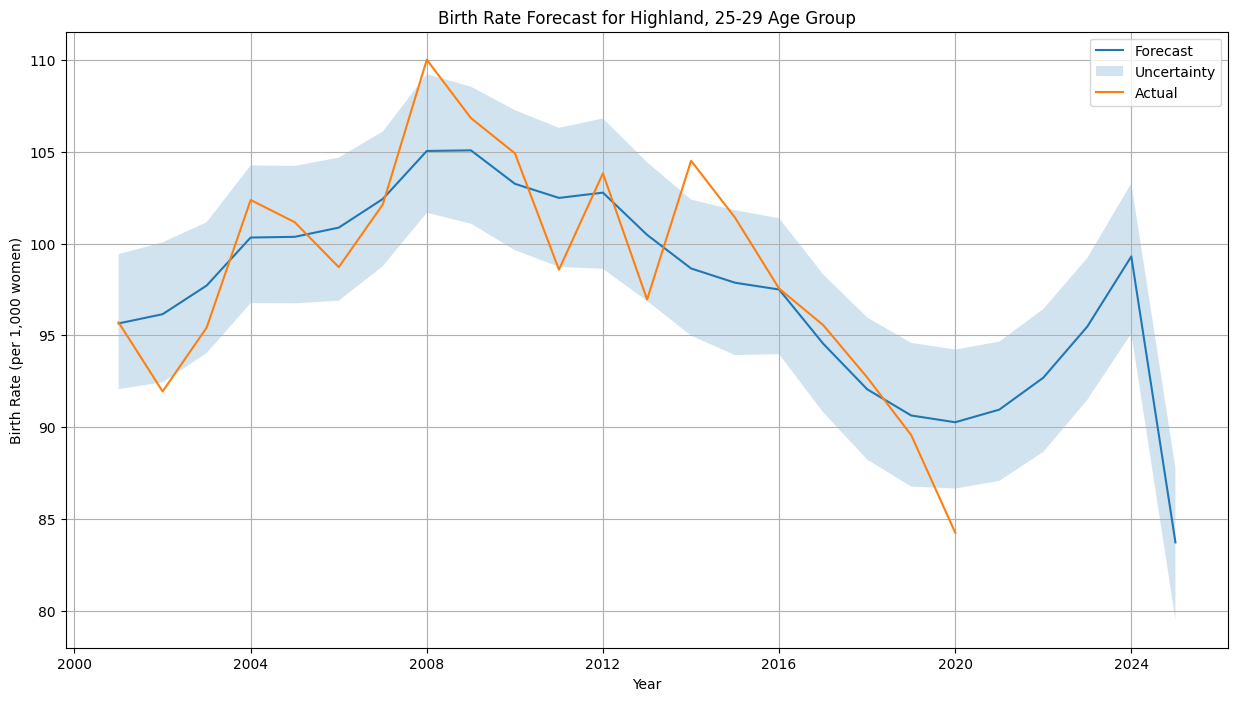

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

df_forecast_highland_25_29 = df_forecasts[(df_forecasts['nhs_board'] == 'Highland') & (df_forecasts['age_group'] == '25 to 29')]
df_actuals_highland_25_29 = df_birth_rate_region_age[(df_birth_rate_region_age['nhs_board'] == 'Highland') & (df_birth_rate_region_age['age_group'] == '25 to 29')]

plt.figure(figsize=(15, 8))
plt.plot(df_forecast_highland_25_29['ds'], df_forecast_highland_25_29['yhat'], label='Forecast')
plt.fill_between(df_forecast_highland_25_29['ds'], df_forecast_highland_25_29['yhat_lower'], df_forecast_highland_25_29['yhat_upper'], alpha=0.2, label='Uncertainty')
plt.plot(pd.to_datetime(df_actuals_highland_25_29['Registration Year'], format='%Y'), df_actuals_highland_25_29['birth_rate'], label='Actual')
plt.title('Birth Rate Forecast for Highland, 25-29 Age Group')
plt.xlabel('Year')
plt.ylabel('Birth Rate (per 1,000 women)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
df_xgboost = df_birth_rate_region_age.copy()
df_xgboost['year'] = df_xgboost['Registration Year']
df_xgboost['month'] = 1
df_xgboost['day'] = 1
df_xgboost['ds'] = pd.to_datetime(df_xgboost[['year', 'month', 'day']])
df_xgboost = df_xgboost.drop(columns=['year', 'month', 'day', 'Registration Year'])

df_xgboost['lag_1'] = df_xgboost.groupby(['nhs_board', 'age_group'])['birth_rate'].shift(1)
df_xgboost = df_xgboost.dropna()

df_xgboost = pd.get_dummies(df_xgboost, columns=['nhs_board', 'age_group'], drop_first=True)

display(df_xgboost.head())

,births,population,birth_rate,ds,lag_1,nhs_board_Borders,nhs_board_Dumfries and Galloway,nhs_board_Fife,nhs_board_Forth Valley,nhs_board_Grampian,...,nhs_board_Lothian,nhs_board_Orkney,nhs_board_Shetland,nhs_board_Tayside,nhs_board_Western Isles,age_group_20 to 24,age_group_25 to 29,age_group_30 to 34,age_group_35 to 39,age_group_40 and over
1,285.834781,43225,6.612719,2002-01-01,7.114113,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,285.769304,43001,6.645643,2003-01-01,6.612719,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,286.766498,42723,6.712228,2004-01-01,6.645643,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,277.482977,42289,6.561588,2005-01-01,6.712228,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,284.159674,41866,6.787361,2006-01-01,6.561588,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_xgboost.drop(columns=['birth_rate', 'ds', 'births', 'population'])
y = df_xgboost['birth_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse}")

RMSE: 9.065278478075525


In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Create a dataframe from the y_test series
y_test_df = y_test.to_frame('birth_rate_test')

# Join with the original dataframe to get the metadata for the test set
test_data = df_birth_rate_region_age.join(y_test_df, how='inner')

# Create the 'ds' column for merging with forecasts
test_data['ds'] = pd.to_datetime(test_data['Registration Year'], format='%Y')

# Merge with the Prophet forecasts
df_prophet_test = pd.merge(test_data, df_forecasts, on=['ds', 'nhs_board', 'age_group'])

# Calculate the RMSE
rmse_prophet = np.sqrt(mean_squared_error(df_prophet_test['birth_rate_test'], df_prophet_test['yhat']))
print(f"Prophet RMSE: {rmse_prophet}")

Prophet RMSE: 1.7699652737790652


In [45]:
# Save the forecasts and actuals data to CSV files
df_forecasts.to_csv('forecasts.csv', index=False)
df_birth_rate_region_age.to_csv('actuals.csv', index=False)

print("Saved forecasts.csv and actuals.csv")

Saved forecasts.csv and actuals.csv
